In [50]:
%matplotlib inline
import cv2
import keras
import numpy as np
import matplotlib.pyplot as plt

In [51]:
train = np.loadtxt('train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('test.csv', delimiter=',', skiprows=1)

In [61]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))

## Визуализируем исходные данные

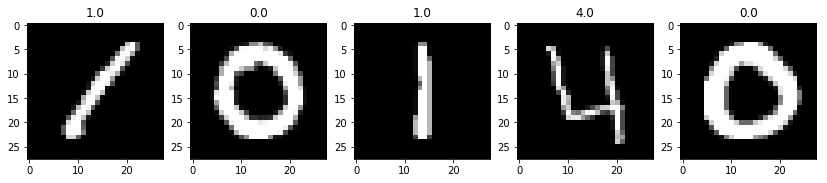

In [62]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

y_train, y_val, x_train, x_val = train_test_split(
    train_label, train_img, test_size=0.1,
    random_state=420)

In [78]:
X = x_train.reshape(-1, 28 * 28).astype(np.float32)
X_mean = X.mean(axis=0)
X -= X_mean
cov = np.dot(X.T, X) / X.shape[0]
U, S, _ = np.linalg.svd(cov)
S_cumsum = np.cumsum(S) / np.sum(S)

In [79]:
S_thr = 0.8
n_comp = np.argmax(np.where(S_cumsum > S_thr, 1, 0))
X_train_reduced = np.dot(X, U[:, :n_comp])

In [80]:
X = x_val.reshape(-1, 28 * 28).astype(np.float32)
X_mean = X.mean(axis=0)
X_val_reduced = np.dot(X, U[:, :n_comp])

In [81]:
print(X_train_reduced.shape)
print(X_val_reduced.shape)

(37800, 42)
(4200, 42)


In [82]:
clf = LogisticRegression()

scl = StandardScaler()

clf.fit(scl.fit_transform(X_train_reduced), y_train)
pred_val = clf.predict(scl.transform(X_val_reduced))

print('Accuracy: %s' % accuracy_score(y_val, pred_val))

print(classification_report(y_val, pred_val))

print(confusion_matrix(y_val, pred_val))

Accuracy: 0.58
             precision    recall  f1-score   support

        0.0       0.97      0.92      0.94       412
        1.0       1.00      0.00      0.00       474
        2.0       0.88      0.77      0.82       418
        3.0       0.84      0.82      0.83       422
        4.0       0.98      0.42      0.59       392
        5.0       0.97      0.18      0.31       419
        6.0       0.99      0.70      0.82       385
        7.0       0.99      0.49      0.65       455
        8.0       0.21      0.99      0.34       402
        9.0       0.74      0.61      0.67       421

avg / total       0.86      0.58      0.59      4200

[[380   0   0   1   2   1   0   0  28   0]
 [  0   1   3   6   0   0   0   0 464   0]
 [  1   0 321   8   1   0   2   3  81   1]
 [  0   0   8 346   0   0   0   0  68   0]
 [  0   0   5   2 166   0   0   0 196  23]
 [  1   0   2  30   0  76   2   0 302   6]
 [  3   0   5   2   1   1 268   0 105   0]
 [  6   0  16  11   0   0   0 223 140  59]
 [

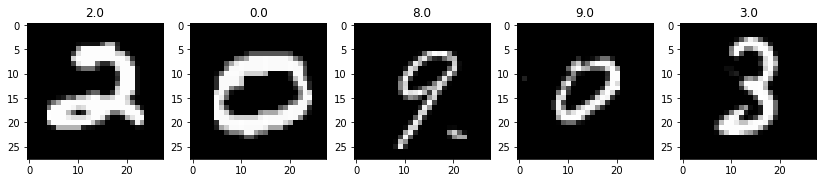

In [83]:
X = test_img.reshape(-1, 28 * 28).astype(np.float32)
X_mean = X.mean(axis=0)
X_test_reduced = np.dot(X, U[:, :n_comp])
pred_test = clf.predict(scl.transform(X_test_reduced))

fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % pred_test[i - 1]);
    
with open('submit1.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred_test, 1):
        dst.write('%s,%s\n' % (i, int(p)))

# C базовым случайным лесом предсказание вышло лучше

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
clf = RandomForestClassifier()

In [86]:
clf.fit(scl.fit_transform(X_train_reduced), y_train)
pred_val = clf.predict(scl.transform(X_val_reduced))

print('Accuracy: %s' % accuracy_score(y_val, pred_val))

print(classification_report(y_val, pred_val))

print(confusion_matrix(y_val, pred_val))

Accuracy: 0.6504761904761904
             precision    recall  f1-score   support

        0.0       0.71      0.68      0.70       412
        1.0       0.92      0.29      0.44       474
        2.0       0.64      0.70      0.67       418
        3.0       0.63      0.83      0.72       422
        4.0       0.86      0.57      0.68       392
        5.0       0.72      0.53      0.61       419
        6.0       0.91      0.65      0.76       385
        7.0       0.74      0.70      0.72       455
        8.0       0.40      0.89      0.55       402
        9.0       0.65      0.71      0.68       421

avg / total       0.72      0.65      0.65      4200

[[282   0  38  17   0  18   7   5  40   5]
 [  1 139  23  50   0   8   0  12 234   7]
 [ 18   1 291  39   2   3   5  12  43   4]
 [  5   1  16 351   2  14   0   7  24   2]
 [ 12   1   7   7 223   5   3  16  33  85]
 [ 17   1  21  46   2 221   2   7  90  12]
 [ 38   5  14  12   9  22 251   3  28   3]
 [ 15   2  24  14   5   1   4 3

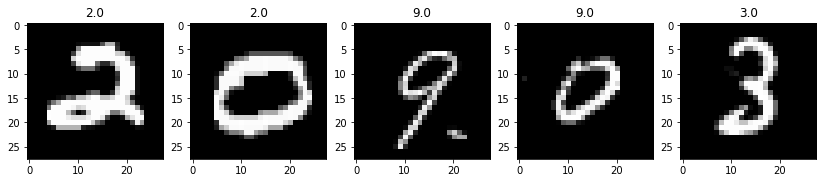

In [87]:
X = test_img.reshape(-1, 28 * 28).astype(np.float32)
X_mean = X.mean(axis=0)
X_test_reduced = np.dot(X, U[:, :n_comp])
pred_test = clf.predict(scl.transform(X_test_reduced))

fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % pred_test[i - 1]);
    
with open('submit1.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred_test, 1):
        dst.write('%s,%s\n' % (i, int(p)))